In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import librosa, librosa.display
from scipy import signal
import os
import winsound

### Вводим переменную для исходного аудио: моно, 8000 Гц, 16 бит
### Аудио файл раскладываем во временной ряд

In [3]:
file = "sound_start.wav"

In [14]:
signal_start, sample_rate = librosa.load(file, sr=22050)

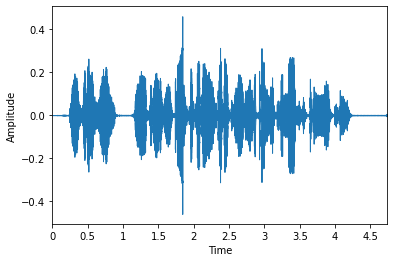

In [35]:
# график амплитуды по времени
librosa.display.waveplot(signal_start, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

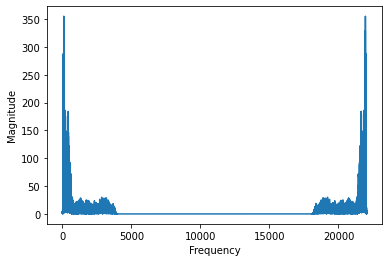

In [41]:
# магнитуды частот получены с помощью преобразования Фурье
fft = np.fft.fft(signal_start)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [21]:
# функция для прослушивания начального аудио
def play_start(filename):
    winsound.PlaySound(filename, winsound.SND_FILENAME)

In [22]:
play_start(file)

### Фильтр низкой частоты

In [37]:
# вычисляем коэффициенты для фильтрации ФНЧ на 100 Гц
# функция butter - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
b, a = signal.butter(1, 0.025)

In [38]:
# фильтруем и получаем временной ряд после фильтрации
# функция filtfilt - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
filteredData = signal.filtfilt(b, a, signal_start)

In [39]:
# из фильтрованного ряда делаем звуковой файл формата wav
sf.write('filter_100_hz.wav', filteredData, sample_rate, 'PCM_16')

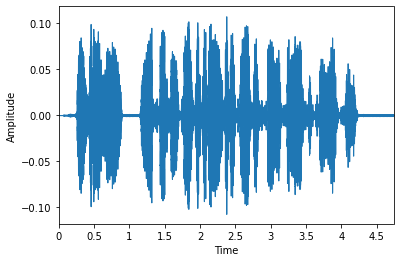

In [40]:
librosa.display.waveplot(filteredData, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

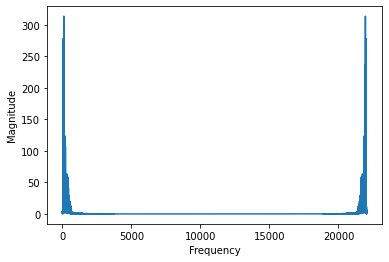

In [42]:
fft_filtered = np.fft.fft(filteredData)
magnitude_filtered = np.abs(fft_filtered)
frequency_filtered = np.linspace(0, sample_rate, len(magnitude_filtered))
plt.plot(frequency_filtered, magnitude_filtered)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [23]:
# функция для прослушивания после фильтрации
def play_filtered(filename):
    winsound.PlaySound(filename, winsound.SND_FILENAME)

In [25]:
file_filtered = 'filter_100_hz.wav'
play_filtered(file_filtered)

### Ревербератор

In [26]:
# массив задержек, 8 штук. Первая задержка 800 отсчётов, что соответствует 33,5 м расстояния
D = np.empty(0)  
D = np.append(D, 800)
for i in range(2, 9):
    D = np.append(D, int(D[0] * 2 ** ((1 - i) / 8)))

In [27]:
# массив весовых коэффициентов для понижения громкости волн задержек
weight_coef = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])

In [31]:
# функция ревербератора
def reverberator(source_file, D, weight_co):
    delay_sum = np.sum(D)  # для расчёта количества отсчётов в итоговом сигнале

    signal_in, sample_rate = librosa.load(source_file, sr=22050)
    signal_length = len(signal_in)

    signal_out_final = np.empty(signal_length + int(delay_sum))

    length_signal_out_final = len(signal_out_final)

    delay_line_1 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_1[i] = signal_in[i] * weight_co[0]

    delay_line_2 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_2[i] = signal_in[i] * weight_co[1]

    delay_line_3 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_3[i] = signal_in[i] * weight_co[2]

    delay_line_4 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_4[i] = signal_in[i] * weight_co[3]

    delay_line_5 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_5[i] = signal_in[i] * weight_co[4]

    delay_line_6 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_6[i] = signal_in[i] * weight_co[5]

    delay_line_7 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_7[i] = signal_in[i] * weight_co[6]

    delay_line_8 = np.empty(signal_length)
    for i in range(0, signal_length):
        delay_line_8[i] = signal_in[i] * weight_co[7]

    signal_out_0 = np.empty(signal_length + int(delay_sum))  # участок до эха

    signal_out_1 = np.empty(signal_length + int(delay_sum))
    signal_out_2 = np.empty(signal_length + int(delay_sum))
    signal_out_3 = np.empty(signal_length + int(delay_sum))
    signal_out_4 = np.empty(signal_length + int(delay_sum))
    signal_out_5 = np.empty(signal_length + int(delay_sum))
    signal_out_6 = np.empty(signal_length + int(delay_sum))
    signal_out_7 = np.empty(signal_length + int(delay_sum))
    signal_out_8 = np.empty(signal_length + int(delay_sum))

    signal_out_11 = np.empty(signal_length + int(delay_sum))
    signal_out_22 = np.empty(signal_length + int(delay_sum))
    signal_out_33 = np.empty(signal_length + int(delay_sum))
    signal_out_44 = np.empty(signal_length + int(delay_sum))
    signal_out_55 = np.empty(signal_length + int(delay_sum))
    signal_out_66 = np.empty(signal_length + int(delay_sum))
    signal_out_77 = np.empty(signal_length + int(delay_sum))
    signal_out_88 = np.empty(signal_length + int(delay_sum))

    for i in range(0, length_signal_out_final):

        if (i <= D[0]):
            signal_out_0[i] = signal_in[i]

        if (i > D[0] and i < signal_length):
            signal_out_1[i] = signal_in[i - int(D[0])]

        if (i > D[1] and i < signal_length):
            signal_out_2[i] = signal_in[i - int(D[0]) - int(D[1])]

        if (i > D[2] and i < signal_length):
            signal_out_3[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2])]

        if (i > D[3] and i < signal_length):
            signal_out_4[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3])]

        if (i > D[4] and i < signal_length):
            signal_out_5[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4])]

        if (i > D[5] and i < signal_length):
            signal_out_6[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5])]

        if (i > D[6] and i < signal_length):
            signal_out_7[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5]) - int(D[6])]

        if (i > D[7] and i < signal_length):
            signal_out_8[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5]) - int(D[6]) - int(D[7])]



        if (i > signal_length and i < signal_length + int(D[0])):
            signal_out_11[i] = signal_in[i - int(D[0])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1])):
            signal_out_22[i] = signal_in[i - int(D[0]) - int(D[1])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2])):
            signal_out_33[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2]) + int(D[3])):
            signal_out_44[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2]) + int(D[3]) + int(D[4])):
            signal_out_55[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2]) + int(D[3]) + int(D[4]) + int(D[5])):
            signal_out_66[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2]) + int(D[3]) + int(D[4]) + int(D[5]) + int(D[6])):
            signal_out_77[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5]) - int(D[6])]

        if (i > signal_length and i < signal_length + int(D[0]) + int(D[1]) + int(D[2]) + int(D[3]) + int(D[4]) + int(D[5]) + int(D[6]) + int(D[7])):
            signal_out_88[i] = signal_in[i - int(D[0]) - int(D[1]) - int(D[2]) - int(D[3]) - int(D[4]) - int(D[5]) - int(D[6]) - int(D[7])]

    for i in range(0, length_signal_out_final):
        signal_out_final[i] = signal_out_0[i] + signal_out_1[i] + signal_out_2[i] + signal_out_3[i] + signal_out_4[i] + signal_out_5[i] + signal_out_6[i] + signal_out_7[i] + signal_out_11[i] + signal_out_22[i] + signal_out_33[i] + signal_out_44[i] + signal_out_55[i] + signal_out_66[i] + signal_out_77[i] + signal_out_88[i]

        
        
    b, a = signal.butter(1, 0.08)
    filteredData = signal.filtfilt(b, a, signal_out_final)

    sf.write('reveberator.wav', filteredData, 22050, 'PCM_16')

In [32]:
# вызов функции ревербератора
reverberator(file, D, weight_coef)

In [33]:
# функция для прослушивания после реверберации
def play_reverberator(filename):
    winsound.PlaySound(filename, winsound.SND_FILENAME)

In [34]:
file_reveberator = 'reveberator.wav'
play_filtered(file_reveberator)

# Distortion

In [9]:
# переведём временной массив начального сигнала из numpy в pandas, применив модуль,
# чтобы испоьзовать функцию describe(), показывающую статистические параметры
signal_start_pd = pd.Series(np.absolute(signal_start))

In [10]:
# вывод основных статистических показателей
signal_start_pd.describe()

count    104517.000000
mean          0.028117
std           0.035430
min           0.000000
25%           0.001509
50%           0.014294
75%           0.042257
max           0.460527
dtype: float64

In [12]:
# формирование временного ряда при отсечении для половины отсчётов (по квартилю 50%)
signal_distortioned_50 = np.empty(len(signal_start))

In [13]:
for i in range(0, len(signal_start)):
    if (signal_start[i] >= 0.014294):
        signal_distortioned_50[i] = 0.014294
    if (signal_start[i] <= - 0.014294):
        signal_distortioned_50[i] = - 0.014294
    if (signal_start[i] > - 0.014294 and signal_start[i] < 0.014294):
        signal_distortioned_50[i] = signal_start[i]

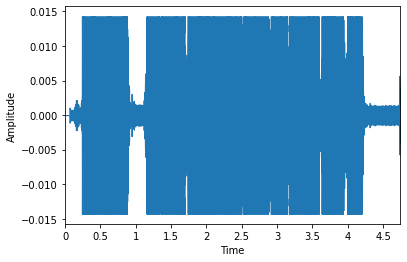

In [22]:
# график амплитуды по времени
librosa.display.waveplot(signal_distortioned_50, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [15]:
# формирование аудио файла 
sf.write('distortioned_50.wav', signal_distortioned_50, sample_rate, 'PCM_16')

In [16]:
# формирование временного ряда и аудио файла при отсечении для четверти отсчётов (по квартилю 75%)
signal_distortioned_75 = np.empty(len(signal_start))

In [17]:
for i in range(0, len(signal_start)):
    if (signal_start[i] >= 0.042257):
        signal_distortioned_75[i] = 0.042257
    if (signal_start[i] <= - 0.042257):
        signal_distortioned_75[i] = - 0.042257
    if (signal_start[i] > - 0.042257 and signal_start[i] < 0.042257):
        signal_distortioned_75[i] = signal_start[i]

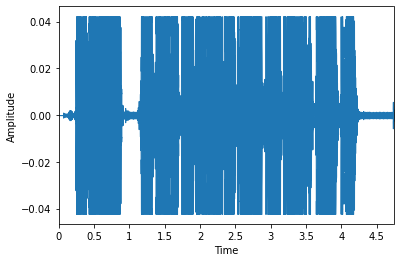

In [23]:
# график амплитуды по времени
librosa.display.waveplot(signal_distortioned_75, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [18]:
sf.write('distortioned_75.wav', signal_distortioned_75, sample_rate, 'PCM_16')

In [19]:
# формирование временного ряда и аудио файла при отсечении для трёх четвертей отсчётов (по квартилю 25%)
signal_distortioned_25 = np.empty(len(signal_start))

In [20]:
for i in range(0, len(signal_start)):
    if (signal_start[i] >= 0.001509):
        signal_distortioned_25[i] = 0.001509
    if (signal_start[i] <= - 0.001509):
        signal_distortioned_25[i] = - 0.001509
    if (signal_start[i] > - 0.001509 and signal_start[i] < 0.001509):
        signal_distortioned_25[i] = signal_start[i]

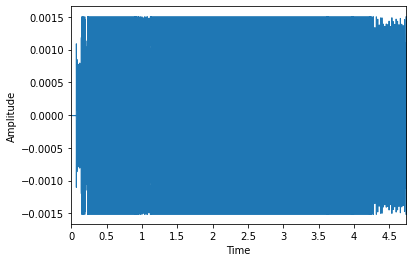

In [24]:
# график амплитуды по времени
librosa.display.waveplot(signal_distortioned_25, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [21]:
sf.write('distortioned_25.wav', signal_distortioned_25, sample_rate, 'PCM_16')

In [25]:
# формирование временного ряда и аудио файла при отсечении по среднему значению
signal_distortioned_mean = np.empty(len(signal_start))

In [26]:
for i in range(0, len(signal_start)):
    if (signal_start[i] >= 0.028117):
        signal_distortioned_mean[i] = 0.028117
    if (signal_start[i] <= - 0.028117):
        signal_distortioned_mean[i] = - 0.028117
    if (signal_start[i] > - 0.028117 and signal_start[i] < 0.028117):
        signal_distortioned_mean[i] = signal_start[i]

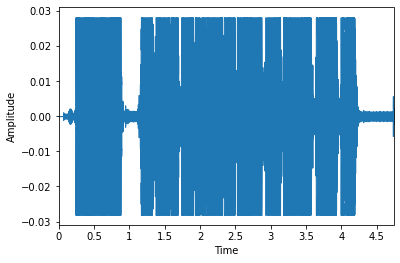

In [28]:
# график амплитуды по времени
librosa.display.waveplot(signal_distortioned_mean, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [27]:
sf.write('distortioned_mean.wav', signal_distortioned_mean, sample_rate, 'PCM_16')

In [29]:
signal_distortioned_50_max = np.empty(len(signal_start))

In [31]:
Max = 0.460527

In [32]:
for i in range(0, len(signal_start)):
    if (signal_start[i] >= 0.014294):
        signal_distortioned_50_max[i] = Max
    if (signal_start[i] <= - 0.014294):
        signal_distortioned_50_max[i] = 0 - Max
    if (signal_start[i] > - 0.014294 and signal_start[i] < 0.014294):
        signal_distortioned_50_max[i] = signal_start[i]

In [33]:
sf.write('distortioned_50_max.wav', signal_distortioned_50_max, sample_rate, 'PCM_16')